# PREDICT SELLING PRICE OF A CAR

Goal of the machine learning algorithm is to find the best fit line equation that can predict the values based on the independent variables.

Our objective in linear regression is to locate a best fit line which implies that the error between predicted values and actual values should be kept to a minimum.

It is a straight line that is used to approximate the relationship between two variables in a set of data points on a scatterplot.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('cars24-car-price-cleaned.csv')

In [5]:
df.shape

(19820, 18)

In [6]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


Whenever we are creating a mathematical model, all the columns shall be in the continous form. That means no column can have the categorical data in it because the ml model is a mathematical model and it only understands the continuous data and not the categorical data.

In [7]:
#nunique: it tells how many unique values for a particular columns are present in a dataset
df['make'].nunique()

41

In [8]:
df['model'].nunique()

3233

In [9]:
df['make'].value_counts()

,count
make,
MARUTI,5650
HYUNDAI,3562
HONDA,1779
MAHINDRA,1276
TOYOTA,1189
TATA,971
FORD,900
VOLKSWAGEN,761
RENAULT,636


In [10]:
df['model'].value_counts()

,count
model,
SWIFT DZIRE VDI,288
ALTO 800 LXI,189
WAGON R VXI,164
SWIFT VDI,150
SWIFT DZIRE VXI,136
...,...
XUV300 W6 DIESEL,1
NANO STD BS IV,1
FABIA 1.2 TDI ACTIVE,1


In [11]:
df['make']=df.groupby('make')['selling_price'].transform('mean')

In [12]:
df['model']=df.groupby('model')['selling_price'].transform('mean')

In [13]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [14]:
#normaliztion(scaling)
from sklearn.preprocessing import MinMaxScaler
#sklearn-library for data processing
#MinMaxScaler- library used for normaliaion purpose
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [15]:
y=df1['selling_price']
x=df1.drop('selling_price',axis=1)
y.shape,x.shape


((19820,), (19820, 17))

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13874, 17), (5946, 17), (13874,), (5946,))

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
model.coef_

array([ 7.26831852e+11, -2.50610352e-01, -2.32537818e-01,  7.38776447e-02,
        4.70141495e-02,  7.26831852e+11,  6.62815814e-02,  8.59178586e-01,
       -7.22882618e-03, -7.02099753e-03,  7.03528760e-03,  1.32983308e-01,
        1.49877118e-02, -6.86552095e-03, -3.59124005e-03, -1.61993065e-02,
       -2.35818239e-02])

In [19]:
model.intercept_

-726831852169.8219

In [20]:
y_test_predict=model.predict(x_test)

In [21]:
y_test_predict

array([0.04589844, 0.21557617, 0.27368164, ..., 0.04516602, 0.13549805,
       0.50073242])

In [22]:
model.score(x_test,y_test)

0.9459835819294395

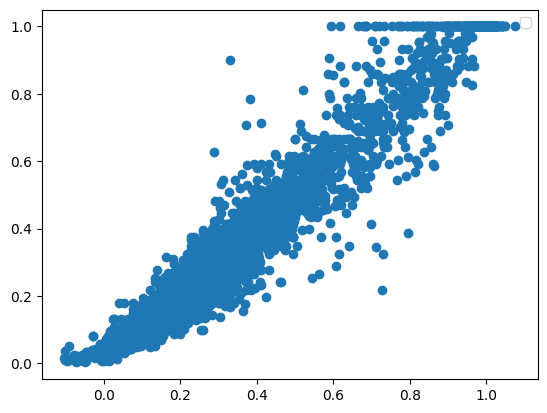

In [23]:
import matplotlib.pyplot as plt
fig=plt.figure()
plt.scatter(y_test_predict,y_test)
plt.legend()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

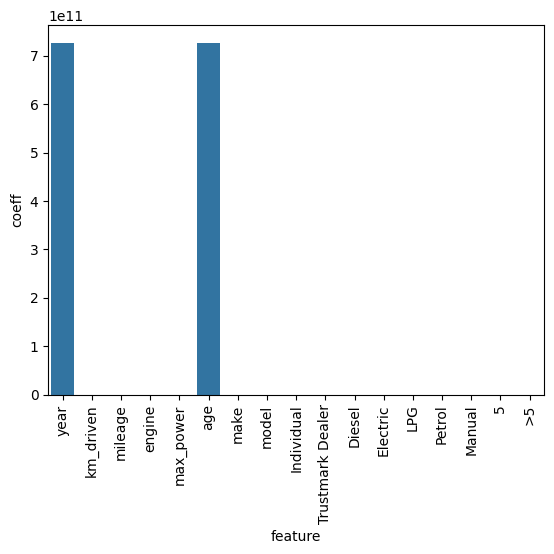

In [24]:
import seaborn as sns
imp=pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),columns=['feature','coeff'])
sns.barplot(x='feature',y='coeff',data=imp)
plt.xticks(rotation=90)